In [2106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder

Загружаем данные, удаляем колонки и заменяем "-1" на NaN

In [2107]:
df = pd.read_csv('parsed.csv')
df.head(10)

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,finish_type,living_meters,kitchen_meters,phone,ceiling_height,district,street,house_number,underground,residential_complex
0,ID 115709096,homeowner,https://serpukhov.cian.ru/sale/flat/301136001/,Серпухов,sale,flat,6.0,6.0,1.0,20.7,...,-1,18 м²,1 м²,7.917510e+10,3 м,Серпухов,Крюкова,4,NaN,NaN
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/305145433/,Серпухов,sale,flat,1.0,9.0,1.0,33.0,...,-1,18 м²,6 м²,7.964553e+10,"2,7 м",NaN,Ворошилова,144,Аннино,NaN
2,ID 3246838,realtor,https://serpukhov.cian.ru/sale/flat/308145954/,Серпухов,sale,flat,4.0,4.0,1.0,14.0,...,-1,-1,-1,7.980713e+10,-1,Красный Текстильщик мкр,Красный Текстильщик,2,NaN,NaN
3,ID 64398571,unknown,https://serpukhov.cian.ru/sale/flat/309086009/,Серпухов,sale,flat,5.0,5.0,1.0,17.5,...,-1,-1,-1,7.964565e+10,-1,Серпухов,Российская,40,NaN,NaN
4,ЛИДЕРМЭЙН,real_estate_agent,https://serpukhov.cian.ru/sale/flat/308401669/,Серпухов,sale,flat,4.0,7.0,1.0,25.9,...,-1,20 м²,5 м²,7.909941e+10,"3,5 м",Серпухов,Химиков,8,NaN,NaN
5,Максим Юсов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/304233768/,Серпухов,sale,flat,2.0,3.0,1.0,46.7,...,-1,25 м²,6 м²,7.964782e+10,-1,Серпухов,2-я Московская,6к3,NaN,NaN
6,ID 9655060,unknown,https://serpukhov.cian.ru/sale/flat/304697154/,Серпухов,sale,flat,3.0,5.0,1.0,29.0,...,-1,25 м²,-1,7.964566e+10,3 м,Серпухов,Форсса,10,NaN,NaN
7,Этажи Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/304332318/,Серпухов,sale,flat,3.0,6.0,1.0,19.1,...,-1,-1,-1,7.964782e+10,-1,Серпухов,Крюкова,4,NaN,NaN
8,Ольга Протченко,realtor,https://serpukhov.cian.ru/sale/flat/295915722/,Серпухов,sale,flat,1.0,2.0,1.0,27.1,...,-1,18 м²,6 м²,7.967134e+10,"2,5 м",NaN,NaN,NaN,NaN,NaN
9,Глеб Маслов,realtor,https://serpukhov.cian.ru/sale/flat/304548494/,Серпухов,sale,flat,6.0,9.0,2.0,42.7,...,-1,"29,7 м²","5,6 м²",7.915051e+10,"2,7 м",Серпухов,Весенняя,56,NaN,NaN


In [2108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8392 entries, 0 to 8391
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                7591 non-null   object 
 1   author_type           7594 non-null   object 
 2   url                   7905 non-null   object 
 3   location              7905 non-null   object 
 4   deal_type             7905 non-null   object 
 5   accommodation_type    7905 non-null   object 
 6   floor                 7905 non-null   float64
 7   floors_count          7905 non-null   float64
 8   rooms_count           7905 non-null   float64
 9   total_meters          7905 non-null   float64
 10  price                 7892 non-null   float64
 11  year_of_construction  7905 non-null   object 
 12  object_type           7905 non-null   object 
 13  have_loggia           7905 non-null   object 
 14  parking_type          7905 non-null   object 
 15  house_material_type  

In [2109]:
df.drop(columns=['author', 'author_type', 'deal_type', 'url', 'accommodation_type', 'phone', 'house_number', 'heating_type', 'have_loggia', 'house_material_type', 'finish_type', 'residential_complex', 'district'], inplace=True)
df = df.drop_duplicates()
df_clean = df.dropna(thresh=3)  

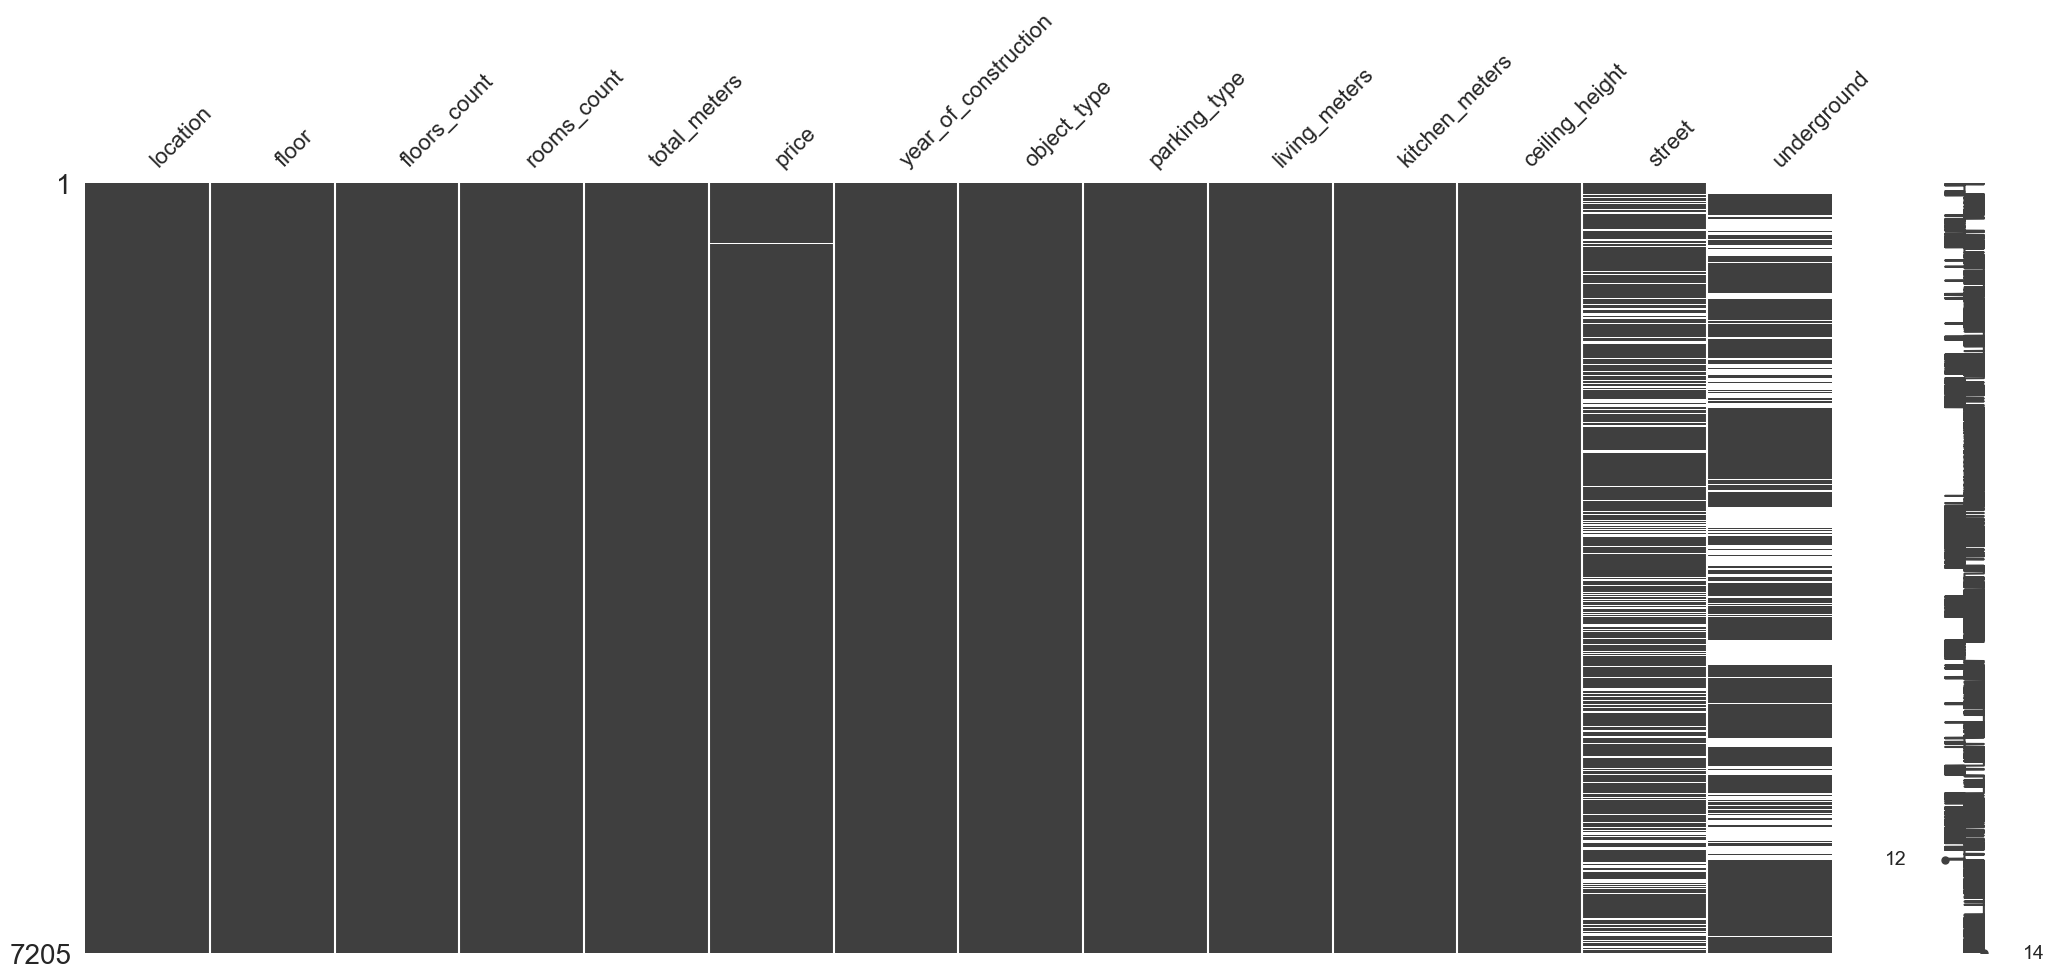

<Figure size 1000x500 with 0 Axes>

In [2110]:
msno.matrix(df_clean)
plt.figure(figsize=(10,5))
plt.show()

In [2111]:
df_clean.replace('-1', np.nan, inplace=True)

C:\Users\Vlad\AppData\Local\Temp\ipykernel_17284\836098550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.replace('-1', np.nan, inplace=True)


In [2112]:
# for column in df_clean.columns:
#     df_clean[column].fillna(df_clean[column].mode()[0], inplace=True)

In [2113]:
df_clean.head(30)

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,parking_type,living_meters,kitchen_meters,ceiling_height,street,underground
0,Серпухов,6.0,6.0,1.0,20.70,2350000.0,1917,Вторичка,Наземная,18 м²,1 м²,3 м,Крюкова,NaN
1,Серпухов,1.0,9.0,1.0,33.00,4150000.0,1975,Вторичка,NaN,18 м²,6 м²,"2,7 м",Ворошилова,Аннино
2,Серпухов,4.0,4.0,1.0,14.00,1700000.0,NaN,Вторичка,NaN,NaN,NaN,NaN,Красный Текстильщик,NaN
3,Серпухов,5.0,5.0,1.0,17.50,2500000.0,1968,Вторичка,NaN,NaN,NaN,NaN,Российская,NaN
4,Серпухов,4.0,7.0,1.0,25.90,3000000.0,2009,Вторичка,Наземная,20 м²,5 м²,"3,5 м",Химиков,NaN
5,Серпухов,2.0,3.0,1.0,46.70,6599999.0,NaN,Вторичка,NaN,25 м²,6 м²,NaN,2-я Московская,NaN
6,Серпухов,3.0,5.0,1.0,29.00,3350000.0,1917,Вторичка,Наземная,25 м²,NaN,3 м,Форсса,NaN
7,Серпухов,3.0,6.0,1.0,19.10,3600000.0,1917,Вторичка,NaN,NaN,NaN,NaN,Крюкова,NaN
8,Серпухов,1.0,2.0,1.0,27.10,1900000.0,1969,Вторичка,Наземная,18 м²,6 м²,"2,5 м",NaN,NaN
9,Серпухов,6.0,9.0,2.0,42.70,3990000.0,1980,Вторичка,Наземная,"29,7 м²","5,6 м²","2,7 м",Весенняя,NaN


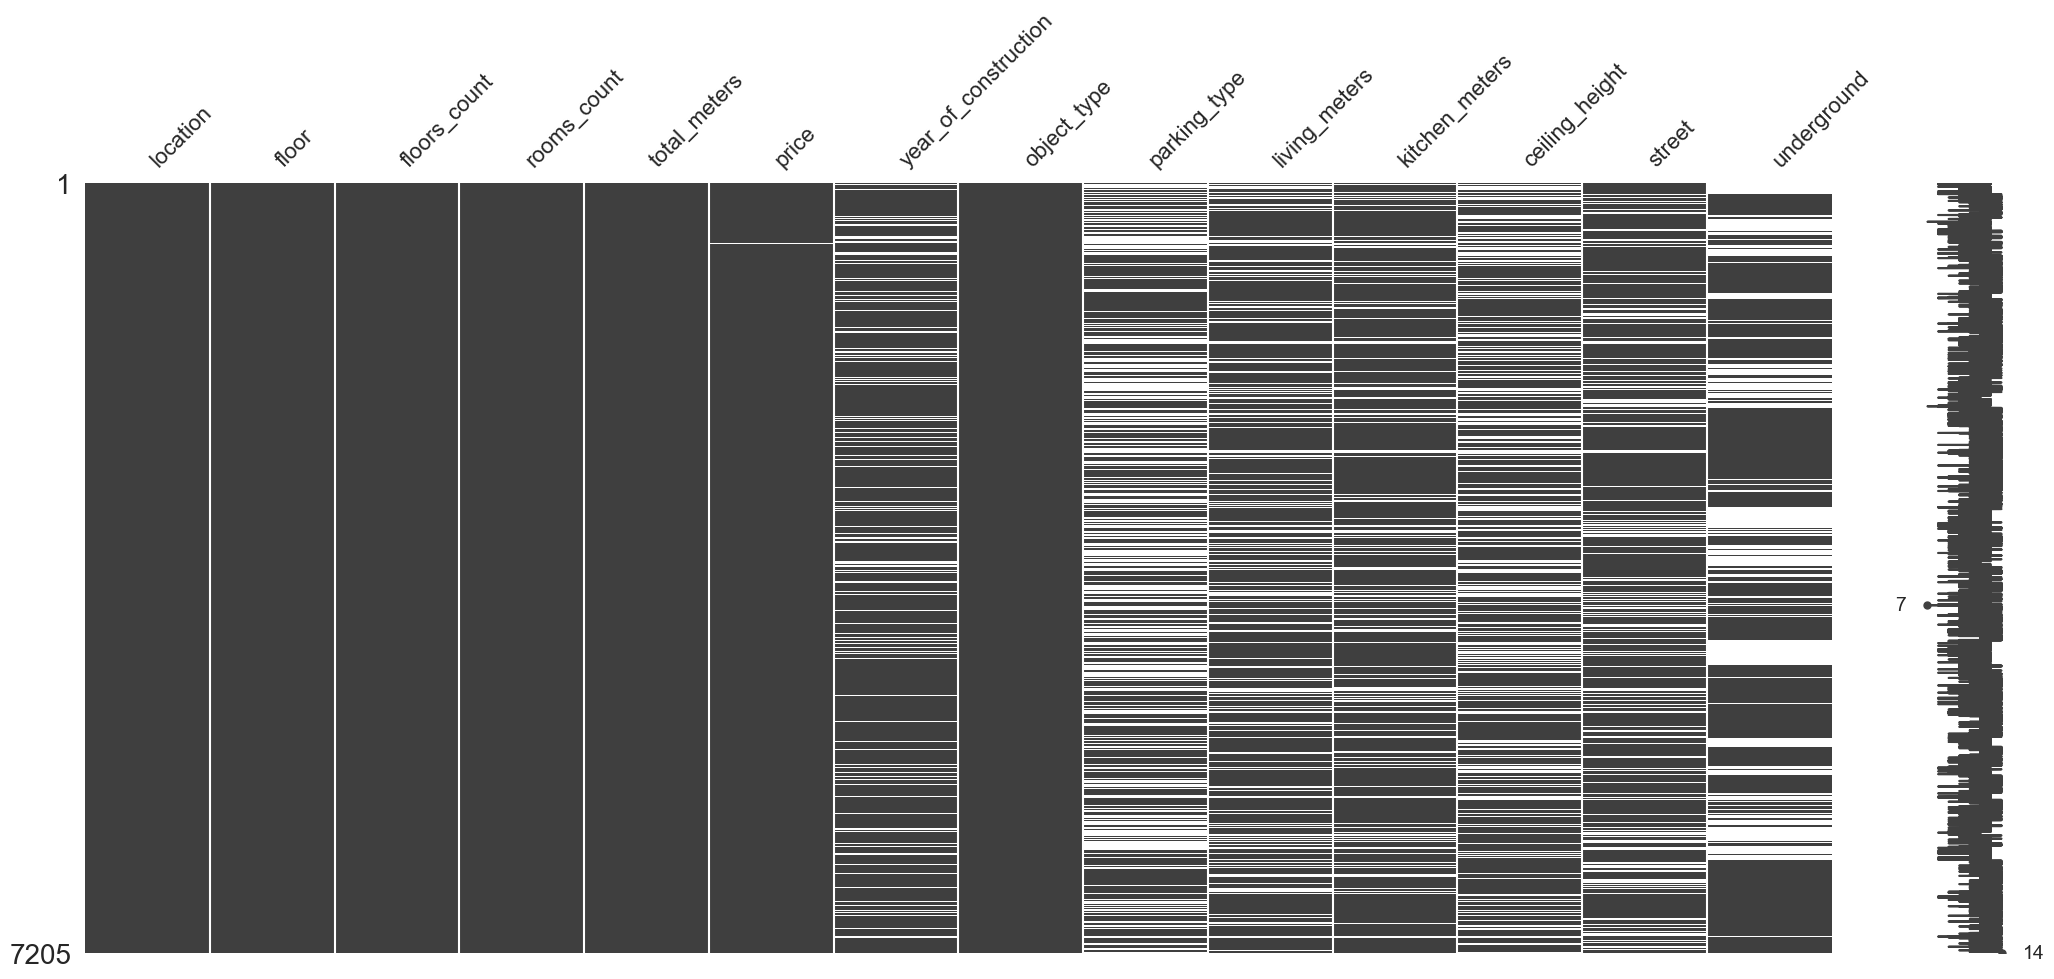

<Figure size 1000x500 with 0 Axes>

In [2114]:
msno.matrix(df_clean)
plt.figure(figsize=(10,5))
plt.show()

Узнаём сколько пустых значений

In [2115]:
check_null = df_clean.isnull().sum()
print(check_null)

location                   0
floor                      0
floors_count               0
rooms_count                0
total_meters               0
price                     13
year_of_construction    1249
object_type                0
parking_type            3168
living_meters           1605
kitchen_meters          1201
ceiling_height          2531
street                  1491
underground             2203
dtype: int64


In [2116]:
df_clean['floor'].unique()

array([ 6.,  1.,  4.,  5.,  2.,  3., 15.,  8.,  7.,  9., 18., 13., 10.,
       11., 35., 22., 12., 20., 14., 19., 37., 24., 28., 17., 34., 16.,
       40., 21., 41., 30., 33., 29., 23., 25., 26., 75., 62., 31., 46.,
       48., 80., 53., 38., 27., 57., 59., 32., 36., 47., 82., 39., 79.,
       66., 60., 51.])

In [2117]:
df_clean['floor'] = df_clean['floor'].replace('floor', '3')

C:\Users\Vlad\AppData\Local\Temp\ipykernel_17284\1059912286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['floor'] = df_clean['floor'].replace('floor', '3')


In [2118]:

df_clean['floor'] = df_clean['floor'].astype('int64')

C:\Users\Vlad\AppData\Local\Temp\ipykernel_17284\3602364599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['floor'] = df_clean['floor'].astype('int64')


In [2119]:
df_clean['floor'].unique()

array([ 6,  1,  4,  5,  2,  3, 15,  8,  7,  9, 18, 13, 10, 11, 35, 22, 12,
       20, 14, 19, 37, 24, 28, 17, 34, 16, 40, 21, 41, 30, 33, 29, 23, 25,
       26, 75, 62, 31, 46, 48, 80, 53, 38, 27, 57, 59, 32, 36, 47, 82, 39,
       79, 66, 60, 51], dtype=int64)

In [2120]:
df_clean['floors_count'].unique()

array([ 6.,  9.,  4.,  5.,  7.,  3.,  2., 17., 10., 24.,  1., 14., 18.,
       12., 23., 20., 41., 21., 43.,  8., 59., 40., 27., 15., 13., 16.,
       22., 29., 25., 30., 49., 31., 39., 53., 28., 85., 35., 26., 32.,
       34., 57., 19., 11., 36., 68., 38., 51., 78., 79., 47., 33., 64.,
       75., 45., 37., 63., 95., 52., 54., 77., 46., 44., 67., 50., 48.,
       76., 42., 55., 56., 97., 65., 66.])

In [2121]:
df_clean['floors_count'].unique()

df_clean['floors_count'] = (df_clean['floors_count'].replace({'floors_count': '3', -1: np.nan}))

df_clean['floors_count'] = df_clean['floors_count'].astype(float)

mean_value = df_clean['floors_count'].mean()

df_clean['floors_count'] = df_clean['floors_count'].fillna(mean_value)

df_clean['floors_count'] = df_clean['floors_count'].astype('int64')

df_clean['floors_count'].unique()


C:\Users\Vlad\AppData\Local\Temp\ipykernel_17284\2363612590.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['floors_count'] = (df_clean['floors_count'].replace({'floors_count': '3', -1: np.nan}))
C:\Users\Vlad\AppData\Local\Temp\ipykernel_17284\2363612590.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['floors_count'] = df_clean['floors_count'].astype(float)
C:\Users\Vlad\AppData\Local\Temp\ipykernel_17284\2363612590.py:9: SettingWithCopyWarning: 
A value is trying to be set on a c

array([ 6,  9,  4,  5,  7,  3,  2, 17, 10, 24,  1, 14, 18, 12, 23, 20, 41,
       21, 43,  8, 59, 40, 27, 15, 13, 16, 22, 29, 25, 30, 49, 31, 39, 53,
       28, 85, 35, 26, 32, 34, 57, 19, 11, 36, 68, 38, 51, 78, 79, 47, 33,
       64, 75, 45, 37, 63, 95, 52, 54, 77, 46, 44, 67, 50, 48, 76, 42, 55,
       56, 97, 65, 66], dtype=int64)

In [2122]:
df_clean.head(10)

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,parking_type,living_meters,kitchen_meters,ceiling_height,street,underground
0,Серпухов,6,6,1.0,20.7,2350000.0,1917,Вторичка,Наземная,18 м²,1 м²,3 м,Крюкова,NaN
1,Серпухов,1,9,1.0,33.0,4150000.0,1975,Вторичка,NaN,18 м²,6 м²,"2,7 м",Ворошилова,Аннино
2,Серпухов,4,4,1.0,14.0,1700000.0,NaN,Вторичка,NaN,NaN,NaN,NaN,Красный Текстильщик,NaN
3,Серпухов,5,5,1.0,17.5,2500000.0,1968,Вторичка,NaN,NaN,NaN,NaN,Российская,NaN
4,Серпухов,4,7,1.0,25.9,3000000.0,2009,Вторичка,Наземная,20 м²,5 м²,"3,5 м",Химиков,NaN
5,Серпухов,2,3,1.0,46.7,6599999.0,NaN,Вторичка,NaN,25 м²,6 м²,NaN,2-я Московская,NaN
6,Серпухов,3,5,1.0,29.0,3350000.0,1917,Вторичка,Наземная,25 м²,NaN,3 м,Форсса,NaN
7,Серпухов,3,6,1.0,19.1,3600000.0,1917,Вторичка,NaN,NaN,NaN,NaN,Крюкова,NaN
8,Серпухов,1,2,1.0,27.1,1900000.0,1969,Вторичка,Наземная,18 м²,6 м²,"2,5 м",NaN,NaN
9,Серпухов,6,9,2.0,42.7,3990000.0,1980,Вторичка,Наземная,"29,7 м²","5,6 м²","2,7 м",Весенняя,NaN


In [2123]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7205 entries, 0 to 8391
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              7205 non-null   object 
 1   floor                 7205 non-null   int64  
 2   floors_count          7205 non-null   int64  
 3   rooms_count           7205 non-null   float64
 4   total_meters          7205 non-null   float64
 5   price                 7192 non-null   float64
 6   year_of_construction  5956 non-null   object 
 7   object_type           7205 non-null   object 
 8   parking_type          4037 non-null   object 
 9   living_meters         5600 non-null   object 
 10  kitchen_meters        6004 non-null   object 
 11  ceiling_height        4674 non-null   object 
 12  street                5714 non-null   object 
 13  underground           5002 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 844.3+ KB


In [2124]:
df_clean['rooms_count'].unique()

df_clean['rooms_count'] = (df_clean['rooms_count'].replace(-1, np.nan))

df_clean['rooms_count'] = df_clean['rooms_count'].astype(float)

mean_value = df_clean['rooms_count'].mean()

df_clean['rooms_count'] = df_clean['rooms_count'].fillna(mean_value)

df_clean['rooms_count'] = df_clean['rooms_count'].astype('int64')

df_clean['rooms_count'].unique()



C:\Users\Vlad\AppData\Local\Temp\ipykernel_17284\213938718.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['rooms_count'] = (df_clean['rooms_count'].replace(-1, np.nan))
C:\Users\Vlad\AppData\Local\Temp\ipykernel_17284\213938718.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['rooms_count'] = df_clean['rooms_count'].astype(float)
C:\Users\Vlad\AppData\Local\Temp\ipykernel_17284\213938718.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

array([1, 2, 3, 4, 5], dtype=int64)

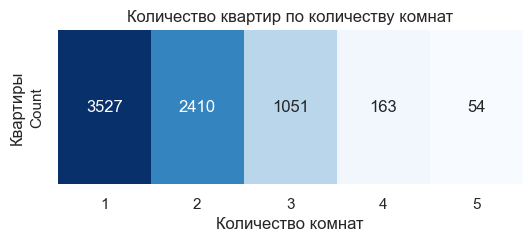

In [2125]:
# Подсчёт количества квартир по каждой категории комнат
room_counts = df_clean['rooms_count'].value_counts().sort_index()

# Преобразование в DataFrame для наглядности таблицы
room_counts_df = room_counts.reset_index()
room_counts_df.columns = ['Rooms', 'Count']

# Создание графика
plt.figure(figsize=(6, 2))
sns.heatmap(room_counts_df.set_index('Rooms').T, annot=True, cmap='Blues', cbar=False, fmt='d')
plt.title("Количество квартир по количеству комнат")
plt.xlabel("Количество комнат")
plt.ylabel("Квартиры")

plt.show()

In [2126]:
df_clean.head(10)

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,parking_type,living_meters,kitchen_meters,ceiling_height,street,underground
0,Серпухов,6,6,1,20.7,2350000.0,1917,Вторичка,Наземная,18 м²,1 м²,3 м,Крюкова,NaN
1,Серпухов,1,9,1,33.0,4150000.0,1975,Вторичка,NaN,18 м²,6 м²,"2,7 м",Ворошилова,Аннино
2,Серпухов,4,4,1,14.0,1700000.0,NaN,Вторичка,NaN,NaN,NaN,NaN,Красный Текстильщик,NaN
3,Серпухов,5,5,1,17.5,2500000.0,1968,Вторичка,NaN,NaN,NaN,NaN,Российская,NaN
4,Серпухов,4,7,1,25.9,3000000.0,2009,Вторичка,Наземная,20 м²,5 м²,"3,5 м",Химиков,NaN
5,Серпухов,2,3,1,46.7,6599999.0,NaN,Вторичка,NaN,25 м²,6 м²,NaN,2-я Московская,NaN
6,Серпухов,3,5,1,29.0,3350000.0,1917,Вторичка,Наземная,25 м²,NaN,3 м,Форсса,NaN
7,Серпухов,3,6,1,19.1,3600000.0,1917,Вторичка,NaN,NaN,NaN,NaN,Крюкова,NaN
8,Серпухов,1,2,1,27.1,1900000.0,1969,Вторичка,Наземная,18 м²,6 м²,"2,5 м",NaN,NaN
9,Серпухов,6,9,2,42.7,3990000.0,1980,Вторичка,Наземная,"29,7 м²","5,6 м²","2,7 м",Весенняя,NaN


In [2127]:
# if (df_clean['total_meters'] == -1).any():
#     print('У вас есть -1')
# else:
#     print('У вас нет -1')


In [2128]:
# if (df_clean['total_meters'] == str).any():
#     print('У вас есть str')
# else:
#     print('У вас нет str')


In [2129]:
# df_clean['total_meters'] = pd.to_numeric(df_clean['total_meters'], errors='coerce').astype('float64')


In [2130]:
df_clean['total_meters'].unique()

array([20.7 , 33.  , 14.  , ..., 30.47, 36.79, 48.39])

In [2131]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7205 entries, 0 to 8391
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              7205 non-null   object 
 1   floor                 7205 non-null   int64  
 2   floors_count          7205 non-null   int64  
 3   rooms_count           7205 non-null   int64  
 4   total_meters          7205 non-null   float64
 5   price                 7192 non-null   float64
 6   year_of_construction  5956 non-null   object 
 7   object_type           7205 non-null   object 
 8   parking_type          4037 non-null   object 
 9   living_meters         5600 non-null   object 
 10  kitchen_meters        6004 non-null   object 
 11  ceiling_height        4674 non-null   object 
 12  street                5714 non-null   object 
 13  underground           5002 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 844.3+ KB


In [2132]:
check_null = df_clean.isnull().sum()
print(check_null)

location                   0
floor                      0
floors_count               0
rooms_count                0
total_meters               0
price                     13
year_of_construction    1249
object_type                0
parking_type            3168
living_meters           1605
kitchen_meters          1201
ceiling_height          2531
street                  1491
underground             2203
dtype: int64


In [2133]:
check_null_price = df_clean.loc[df_clean['price'].isna()]
check_null_price

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,parking_type,living_meters,kitchen_meters,ceiling_height,street,underground
115,Москва,8,59,3,56.10,NaN,2028,Новостройка,NaN,"36,1 м²",NaN,"2,85 м",NaN,Давыдково
499,Одинцово,2,24,1,36.30,NaN,2025,Новостройка,Подземная,"21,8 м²",NaN,"2,8 м",NaN,Одинцово
579,Ивантеевка,2,59,2,31.10,NaN,2028,Новостройка,NaN,"15,7 м²",NaN,"2,85 м",NaN,Давыдково
598,Ивантеевка,9,12,3,115.10,NaN,2023,Новостройка,NaN,"48,4 м²",28 м²,"2,85 м",Белоостровская,Лесная
738,Москва,2,59,2,31.10,NaN,2028,Новостройка,NaN,"15,7 м²",NaN,"2,85 м",NaN,Давыдково
927,Москва,2,59,1,30.40,NaN,2028,Новостройка,NaN,"9,7 м²",NaN,"2,85 м",NaN,Давыдково
1040,Москва,14,21,1,38.93,NaN,2026,Новостройка,Подземная,NaN,NaN,"2,85 м",Северный ао,Селигерская
1103,Москва,11,21,3,74.50,NaN,2020,Новостройка / Апартаменты,NaN,"46,9 м²","7,8 м²","3,3 м",Аминьевское шоссе,Давыдково
3027,Москва,16,47,4,80.30,NaN,2027,Новостройка,Подземная,"33,6 м²","27,6 м²","2,68 м",NaN,Кожуховская
3053,Москва,2,59,4,94.90,NaN,2028,Новостройка,NaN,"54,6 м²",NaN,"2,85 м",NaN,Давыдково


In [2134]:
df_clean.drop(115, inplace=True)
df_clean.drop(499, inplace=True)
df_clean.drop(579, inplace=True)
df_clean.drop(598, inplace=True)
df_clean.drop(738, inplace=True)
df_clean.drop(927, inplace=True)
df_clean.drop(1040, inplace=True)
df_clean.drop(1103, inplace=True)
df_clean.drop(3027, inplace=True)
df_clean.drop(3053, inplace=True)
df_clean.drop(3498, inplace=True)
df_clean.drop(3946, inplace=True)
df_clean.drop(5841, inplace=True)

C:\Users\Vlad\AppData\Local\Temp\ipykernel_17284\1534079239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(115, inplace=True)
C:\Users\Vlad\AppData\Local\Temp\ipykernel_17284\1534079239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(499, inplace=True)
C:\Users\Vlad\AppData\Local\Temp\ipykernel_17284\1534079239.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(579, inplace=True)
C:\U

In [2135]:
check_null_price = df_clean.loc[df_clean['price'].isna()]
check_null_price

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,parking_type,living_meters,kitchen_meters,ceiling_height,street,underground


In [2136]:
df_clean['price'] = df_clean['price'].astype('int64')

df_clean['price'].unique()


C:\Users\Vlad\AppData\Local\Temp\ipykernel_17284\1350605944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['price'] = df_clean['price'].astype('int64')


array([ 2350000,  4150000,  1700000, ...,  9865233,  8607014, 13014356],
      dtype=int64)

In [2137]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7192 entries, 0 to 8391
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              7192 non-null   object 
 1   floor                 7192 non-null   int64  
 2   floors_count          7192 non-null   int64  
 3   rooms_count           7192 non-null   int64  
 4   total_meters          7192 non-null   float64
 5   price                 7192 non-null   int64  
 6   year_of_construction  5943 non-null   object 
 7   object_type           7192 non-null   object 
 8   parking_type          4033 non-null   object 
 9   living_meters         5588 non-null   object 
 10  kitchen_meters        6001 non-null   object 
 11  ceiling_height        4661 non-null   object 
 12  street                5711 non-null   object 
 13  underground           4989 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 842.8+ KB


In [2138]:
duplicates = df_clean.duplicated().sum()
print("Количество дубликатов в DataFrame:", duplicates)
df_clean = df_clean.drop_duplicates()


Количество дубликатов в DataFrame: 0


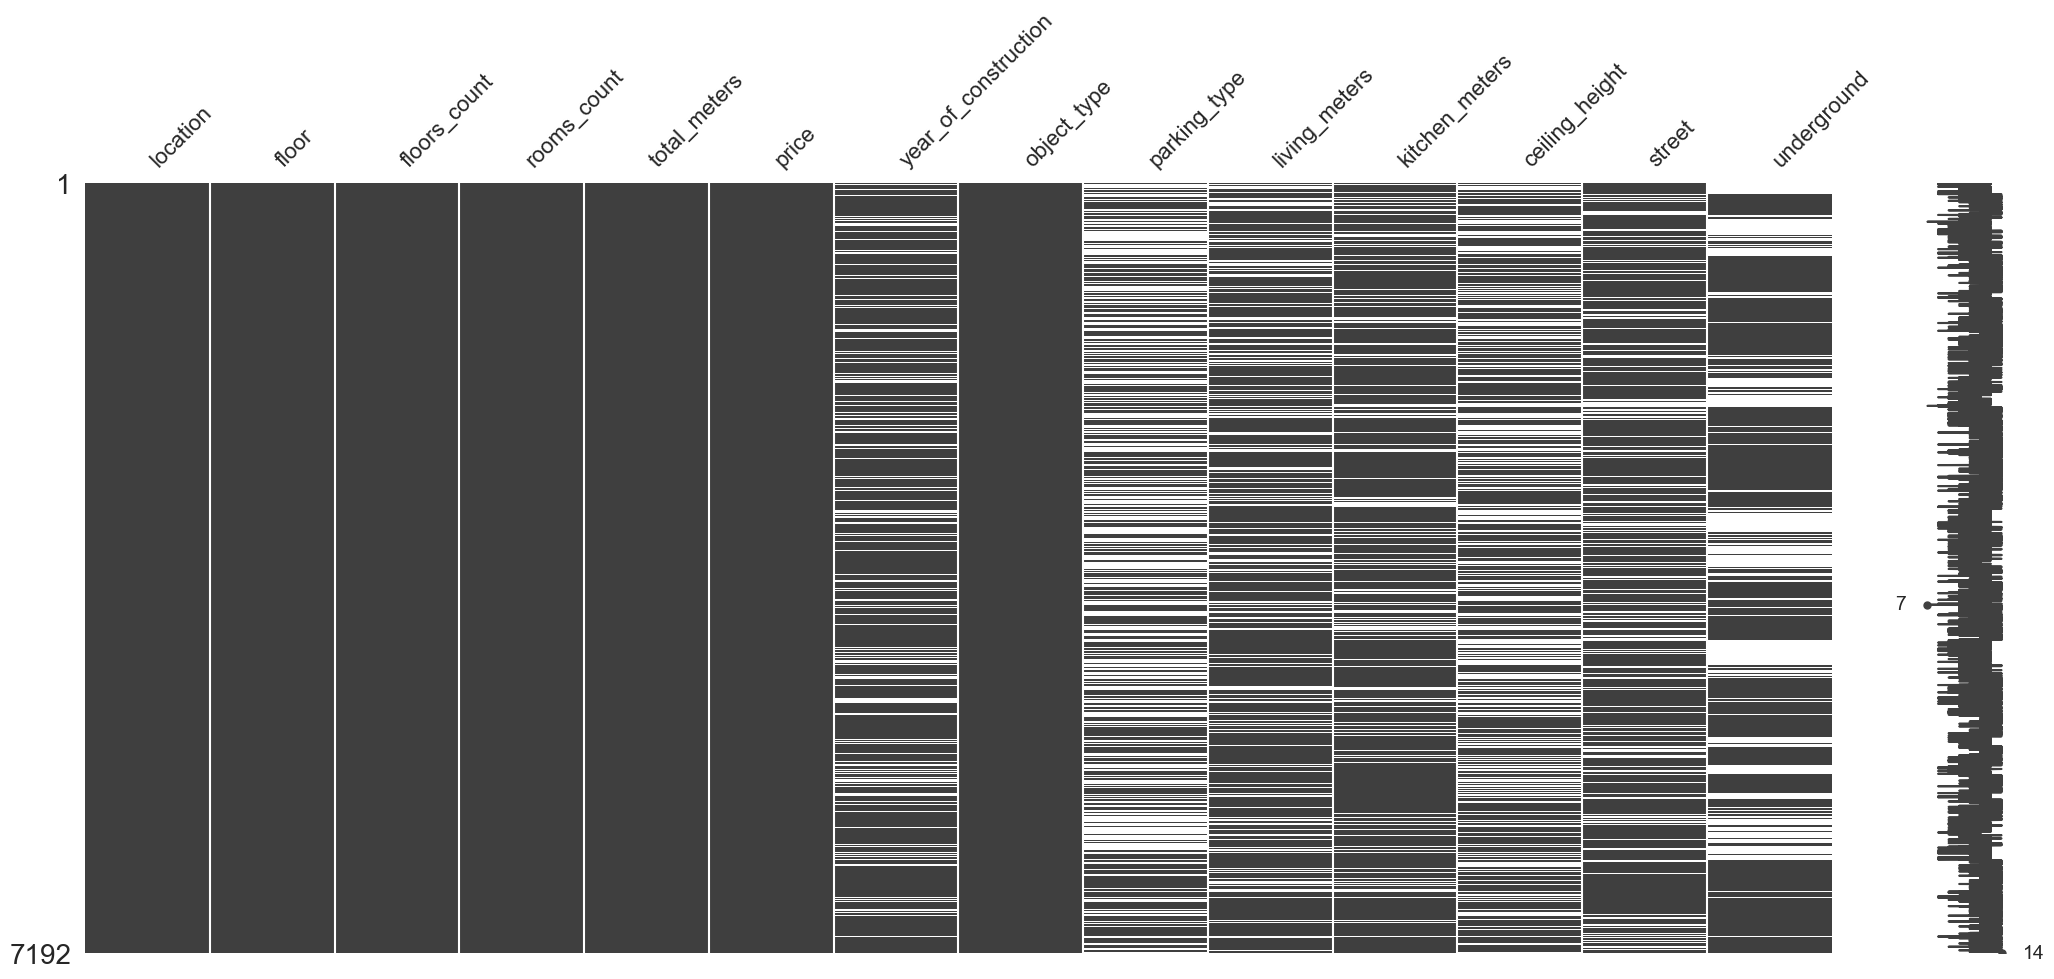

<Figure size 1000x500 with 0 Axes>

In [2139]:
msno.matrix(df_clean)
plt.figure(figsize=(10,5))
plt.show()

In [2140]:
# label_encoder = LabelEncoder()

# df_clean['location'] = label_encoder.fit_transform(df_clean['location'])
# df_clean['location'] = label_encoder.fit_transform(df_clean['location']).astype("int64")
# df_clean['underground'] = label_encoder.fit_transform(df_clean['underground'])
# df_clean['underground'] = label_encoder.fit_transform(df_clean['underground']).astype("int64")
# df_clean['street'] = label_encoder.fit_transform(df_clean['street'])
# df_clean['street'] = label_encoder.fit_transform(df_clean['street']).astype("int64")

In [2141]:
df_clean['year_of_construction'].unique()

array(['1917', '1975', nan, '1968', '2009', '1969', '1980', '1990',
       '1964', '2025', '2015', '1970', '1984', '1965', '2010', 'Аукцион',
       '1992', '2011', '1986', '1994', '1956', '1966', '1973', '1971',
       '1957', '2013', '1981', '1972', '1959', '2004', '1962', '2019',
       '1978', '1977', '2003', '1963', '1952', '2024', '2007', '1995',
       '1976', '1982', '1953', '2008', '2026', '2023', '1941', '1993',
       '2016', '2027', '2017', '2022', '1932', '2012', '1960', '2006',
       '1926', '2020', '1943', '2014', '2021', '1967', '1904', '2028',
       '1991', '2018', '1987', '1988', '1974', 'Напишите автору', '1979',
       '1929', '1989', '1985', '1930', '2005', '1958', '1996', '1940',
       '1948', '1961', '1938', '1997', '2002', '2001', '1999', '1983',
       '1998', '1902', '2000', '1915', '1910', '1939', '1954', '1897',
       '1955', '1900', 'Позвоните автору', '1949', '1947', '1901', '1909',
       '1600', '1951', '1936', '1931', '1950', '1934', '1928', '1945',

In [2142]:

df_clean = df_clean[df_clean['year_of_construction'] != -1]
df_clean['year_of_construction'] = df_clean['year_of_construction'].replace({
    '-1': np.nan,
    'year_of_construction': np.nan, 
    'Аукцион': np.nan, 
    'Напишите автору': np.nan, 
    'Позвоните автору': np.nan
})
df_clean['year_of_construction'] = df_clean['year_of_construction'].astype(float)

mean_value = df_clean['year_of_construction'].mean()

df_clean['year_of_construction'] = df_clean['year_of_construction'].fillna(mean_value)

df_clean['year_of_construction'] = df_clean['year_of_construction'].astype('int64')

df_clean['year_of_construction'].unique()

array([1917, 1975, 2006, 1968, 2009, 1969, 1980, 1990, 1964, 2025, 2015,
       1970, 1984, 1965, 2010, 1992, 2011, 1986, 1994, 1956, 1966, 1973,
       1971, 1957, 2013, 1981, 1972, 1959, 2004, 1962, 2019, 1978, 1977,
       2003, 1963, 1952, 2024, 2007, 1995, 1976, 1982, 1953, 2008, 2026,
       2023, 1941, 1993, 2016, 2027, 2017, 2022, 1932, 2012, 1960, 1926,
       2020, 1943, 2014, 2021, 1967, 1904, 2028, 1991, 2018, 1987, 1988,
       1974, 1979, 1929, 1989, 1985, 1930, 2005, 1958, 1996, 1940, 1948,
       1961, 1938, 1997, 2002, 2001, 1999, 1983, 1998, 1902, 2000, 1915,
       1910, 1939, 1954, 1897, 1955, 1900, 1949, 1947, 1901, 1909, 1600,
       1951, 1936, 1931, 1950, 1934, 1928, 1945, 1937, 1927, 1896, 1777,
       2031, 1935], dtype=int64)

In [2143]:
df_clean = df_clean[(df_clean['year_of_construction'] >= 1980) & (df_clean['year_of_construction'] <= 2025)]

In [2144]:
df_clean['year_of_construction'].unique()

array([2006, 2009, 1980, 1990, 2025, 2015, 1984, 2010, 1992, 2011, 1986,
       1994, 2013, 1981, 2004, 2019, 2003, 2024, 2007, 1995, 1982, 2008,
       2023, 1993, 2016, 2017, 2022, 2012, 2020, 2014, 2021, 1991, 2018,
       1987, 1988, 1989, 1985, 2005, 1996, 1997, 2002, 2001, 1999, 1983,
       1998, 2000], dtype=int64)

In [2145]:
average_prices = df_clean.groupby('year_of_construction')['price'].mean().reset_index()
average_prices

,year_of_construction,price
0,1980,7.294178e+06
1,1981,5.850914e+06
2,1982,7.060431e+06
3,1983,7.341194e+06
4,1984,6.016636e+06
5,1985,7.399265e+06
6,1986,6.710800e+06
7,1987,7.883667e+06
8,1988,7.861333e+06
9,1989,8.150069e+06


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45],
 [Text(0, 0, '1980'),
  Text(1, 0, '1981'),
  Text(2, 0, '1982'),
  Text(3, 0, '1983'),
  Text(4, 0, '1984'),
  Text(5, 0, '1985'),
  Text(6, 0, '1986'),
  Text(7, 0, '1987'),
  Text(8, 0, '1988'),
  Text(9, 0, '1989'),
  Text(10, 0, '1990'),
  Text(11, 0, '1991'),
  Text(12, 0, '1992'),
  Text(13, 0, '1993'),
  Text(14, 0, '1994'),
  Text(15, 0, '1995'),
  Text(16, 0, '1996'),
  Text(17, 0, '1997'),
  Text(18, 0, '1998'),
  Text(19, 0, '1999'),
  Text(20, 0, '2000'),
  Text(21, 0, '2001'),
  Text(22, 0, '2002'),
  Text(23, 0, '2003'),
  Text(24, 0, '2004'),
  Text(25, 0, '2005'),
  Text(26, 0, '2006'),
  Text(27, 0, '2007'),
  Text(28, 0, '2008'),
  Text(29, 0, '2009'),
  Text(30, 0, '2010'),
  Text(31, 0, '2011'),
  Text(

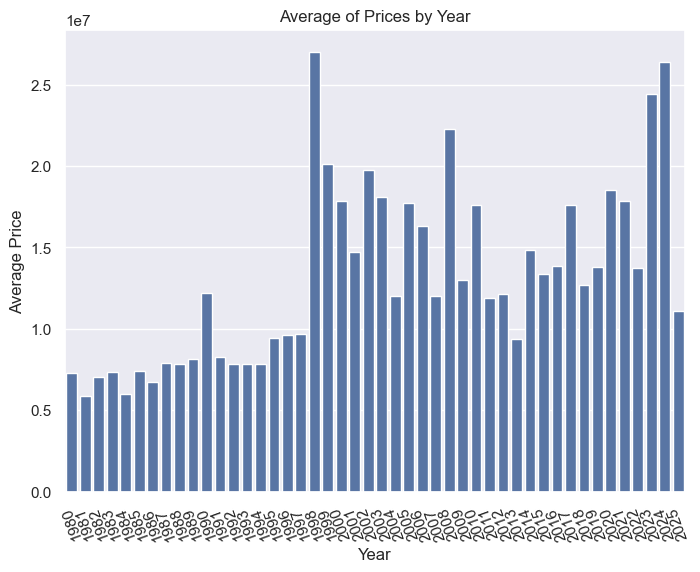

In [2146]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='year_of_construction', y='price', data=average_prices)
plt.title('Average of Prices by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(rotation=110)

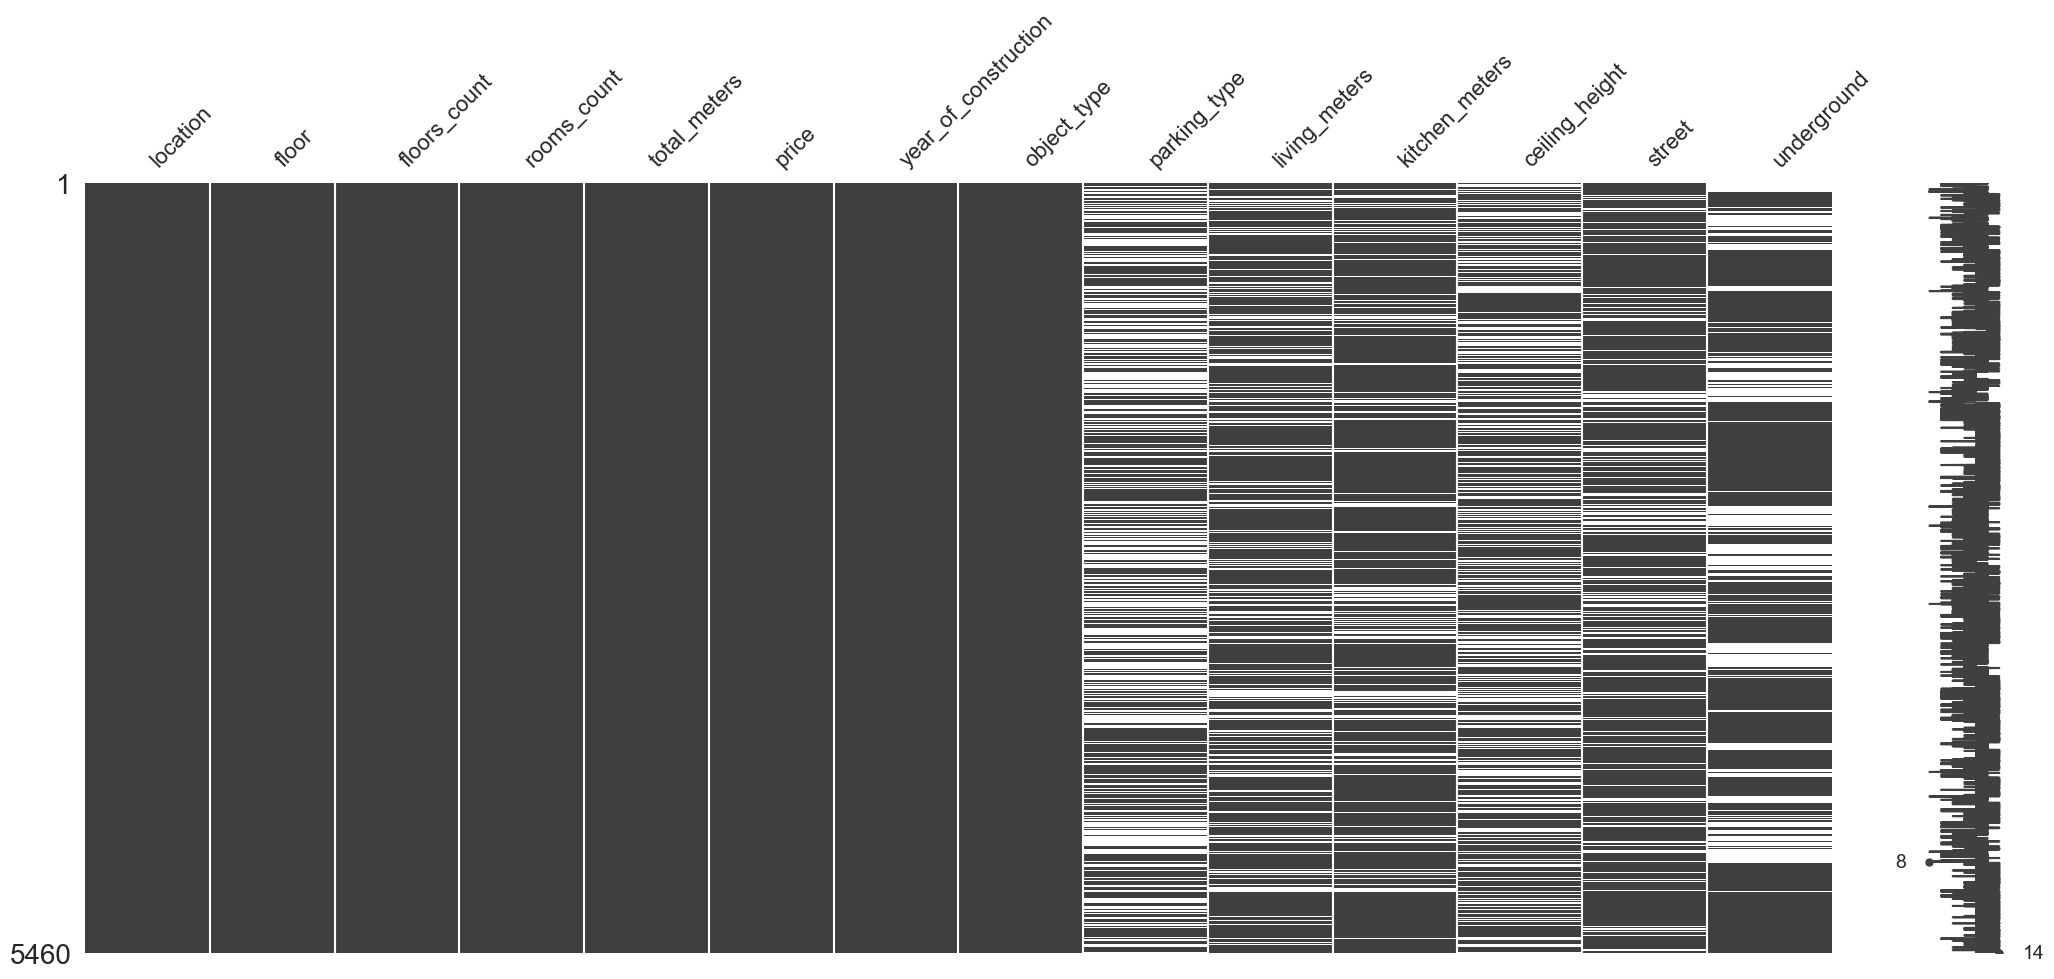

<Figure size 1000x500 with 0 Axes>

In [2147]:
msno.matrix(df_clean)
plt.figure(figsize=(10,5))
plt.show()

In [2148]:
# Заменяем 'м²', '\xa0' и '-1' на NaN в living_meters
df_clean['living_meters'] = (
    df_clean['living_meters']
    .replace({'м²': '', '\xa0': '', '-1': np.nan}, regex=True)
)

# Преобразуем значения в числовой формат
df_clean['living_meters'] = pd.to_numeric(df_clean['living_meters'], errors='coerce')

# Рассчитываем среднее значение по столбцу, игнорируя NaN
mean_value_living = df_clean['living_meters'].mean()

# Заполняем NaN средним значением
df_clean['living_meters'].fillna(mean_value_living, inplace=True)

# Переводим столбец в целочисленный формат
df_clean['living_meters'] = df_clean['living_meters'].astype('int64')

print(df_clean['living_meters'].head(10))


2     29
4     20
5     25
9     29
10    29
12    29
13    29
14    29
15    29
16    28
Name: living_meters, dtype: int64


In [2149]:
# Заменяем 'м²', '\xa0' и '-1' на NaN
df_clean['kitchen_meters'] = (
    df_clean['kitchen_meters']
    .replace({'м²': '', '\xa0': '', '-1': np.nan}, regex=True)
)

# Преобразуем значения в числовой формат
df_clean['kitchen_meters'] = pd.to_numeric(df_clean['kitchen_meters'], errors='coerce')

# Рассчитываем среднее значение по столбцу kitchen_meters, игнорируя NaN
mean_value = df_clean['kitchen_meters'].mean()

# Заполняем NaN средним значением
df_clean['kitchen_meters'].fillna(mean_value, inplace=True)

df_clean['kitchen_meters'] = df_clean['kitchen_meters'].astype('int64')

print(df_clean['kitchen_meters'].head(10))


2     10
4      5
5      6
9     10
10     6
12     3
13    10
14    10
15    10
16     6
Name: kitchen_meters, dtype: int64


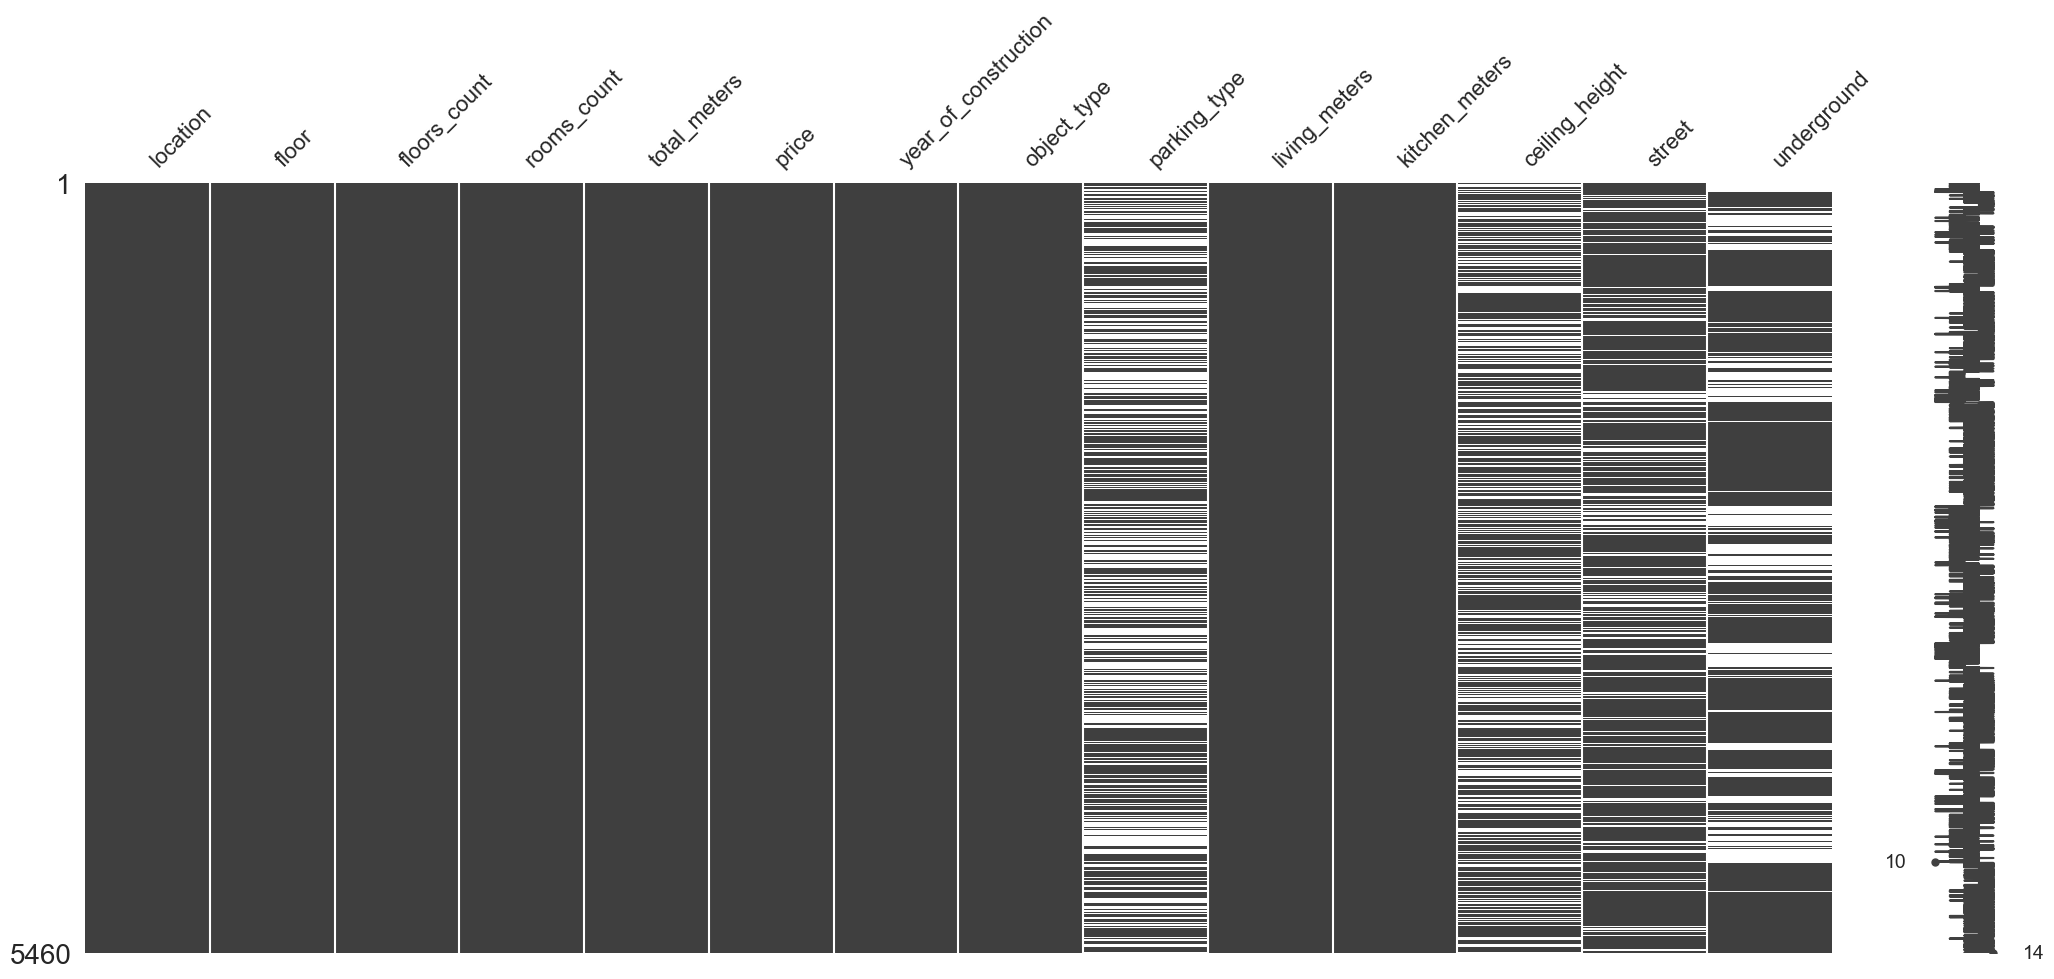

<Figure size 1000x500 with 0 Axes>

In [2150]:
msno.matrix(df_clean)
plt.figure(figsize=(10,5))
plt.show()

In [2151]:
df_clean['object_type'].unique()

array(['Вторичка', 'Новостройка', 'Вторичка / Апартаменты',
       'Новостройка / Апартаменты', 'Вторичка / Пентхаус',
       'Новостройка / Пентхаус'], dtype=object)

In [2152]:
label_encoder = LabelEncoder()

df_clean['object_type'] = label_encoder.fit_transform(df_clean['object_type'])
df_clean['object_type'] = label_encoder.fit_transform(df_clean['object_type']).astype("int64")
df_clean['location'] = label_encoder.fit_transform(df_clean['location'])
df_clean['location'] = label_encoder.fit_transform(df_clean['location']).astype("int64")


In [2153]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5460 entries, 2 to 8391
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              5460 non-null   int64  
 1   floor                 5460 non-null   int64  
 2   floors_count          5460 non-null   int64  
 3   rooms_count           5460 non-null   int64  
 4   total_meters          5460 non-null   float64
 5   price                 5460 non-null   int64  
 6   year_of_construction  5460 non-null   int64  
 7   object_type           5460 non-null   int64  
 8   parking_type          2981 non-null   object 
 9   living_meters         5460 non-null   int64  
 10  kitchen_meters        5460 non-null   int64  
 11  ceiling_height        3416 non-null   object 
 12  street                4501 non-null   object 
 13  underground           3839 non-null   object 
dtypes: float64(1), int64(9), object(4)
memory usage: 639.8+ KB


In [2154]:
df_clean['parking_type'].unique()

array([nan, 'Наземная', 'Многоуровневая', 'Подземная', 'Открытая'],
      dtype=object)

In [2155]:
df_clean = df_clean[df_clean['parking_type'] != '-1']

df_clean['parking_type'] = df_clean['parking_type'].replace({'-1': np.nan, 'parking_type': np.nan})

label_encoder = LabelEncoder()
df_clean['parking_type'] = label_encoder.fit_transform(df_clean['parking_type'].astype('int64'))


ValueError: cannot convert float NaN to integer

In [ ]:
df_clean.info()

In [ ]:
df_clean['ceiling_height'].unique()

In [ ]:
# Удаление лишних символов и пробелов
df_clean['ceiling_height'] = (
    df_clean['ceiling_height']
    .str.strip()  # Убираем пробелы с краев
    .replace({'\xa0м': '', '-1': np.nan, 'ceiling_height': np.nan}, regex=True)
)

# Преобразование к числовому формату с заменой на NaN в случае ошибок
df_clean['ceiling_height'] = pd.to_numeric(df_clean['ceiling_height'], errors='coerce')

# Заполнение NaN средним значением
mean_value = df_clean['ceiling_height'].mean()
df_clean['ceiling_height'].fillna(mean_value, inplace=True)

# Преобразование к int
df_clean['ceiling_height'] = df_clean['ceiling_height'].astype(int)

print(df_clean['ceiling_height'].head(10))

In [ ]:
df_clean.info()

In [ ]:
df_clean['price_per_one'] = df_clean['price']/df_clean['total_meters']
df_clean.head(10)

# df['location'].value_counts()

In [ ]:
plt.subplots(figsize=(10, 10))
sns.heatmap(df_clean.corr(), square=True, annot=True, cmap='coolwarm')
plt.title("Корреляция признаков")
plt.show()

In [ ]:
df_clean.head(20)